In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
def visualize_prediction(confidence, first_f, last_f, no_features, name_time_column, dataframe, title, location_line, line=False):
    fig, axes = plt.subplots(2, 2, figsize=(15,15), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(first_f,last_f):
        sns.scatterplot(data=dataframe, 
                        x=name_time_column, 
                        y=columns[i], 
                        ax=ax[i-first_f], 
                        label="target", 
                        palette="Greys")
        sns.lineplot(data=dataframe, 
                     x=name_time_column, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_f], 
                     label="predicted", 
                     palette="Blues")
        ax[i-first_f].fill_between(dataframe[i+no_features].values - confidence * dataframe[i+2*no_features].values, 
                              dataframe[i+no_features].values + confidence * dataframe[i+2*no_features].values, 
                              alpha=0.2, 
                              color='blue')
        if line:
            ax[i-first_f].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1, label="train-validation")
        ax[i-first_f].set(xlabel='up time', ylabel='sensor value')
        ax[i-first_f].set(title=columns[i])
        plt.setp(ax[i-first_f].get_xticklabels(), rotation=45) 
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Visualisation of Prediction - Artifical Signal

In [3]:
artifical_data = pd.read_csv("../../files/prediction/MLE/artifical_2_signals.csv", sep=";")
subset = artifical_data.iloc[10000:,:]

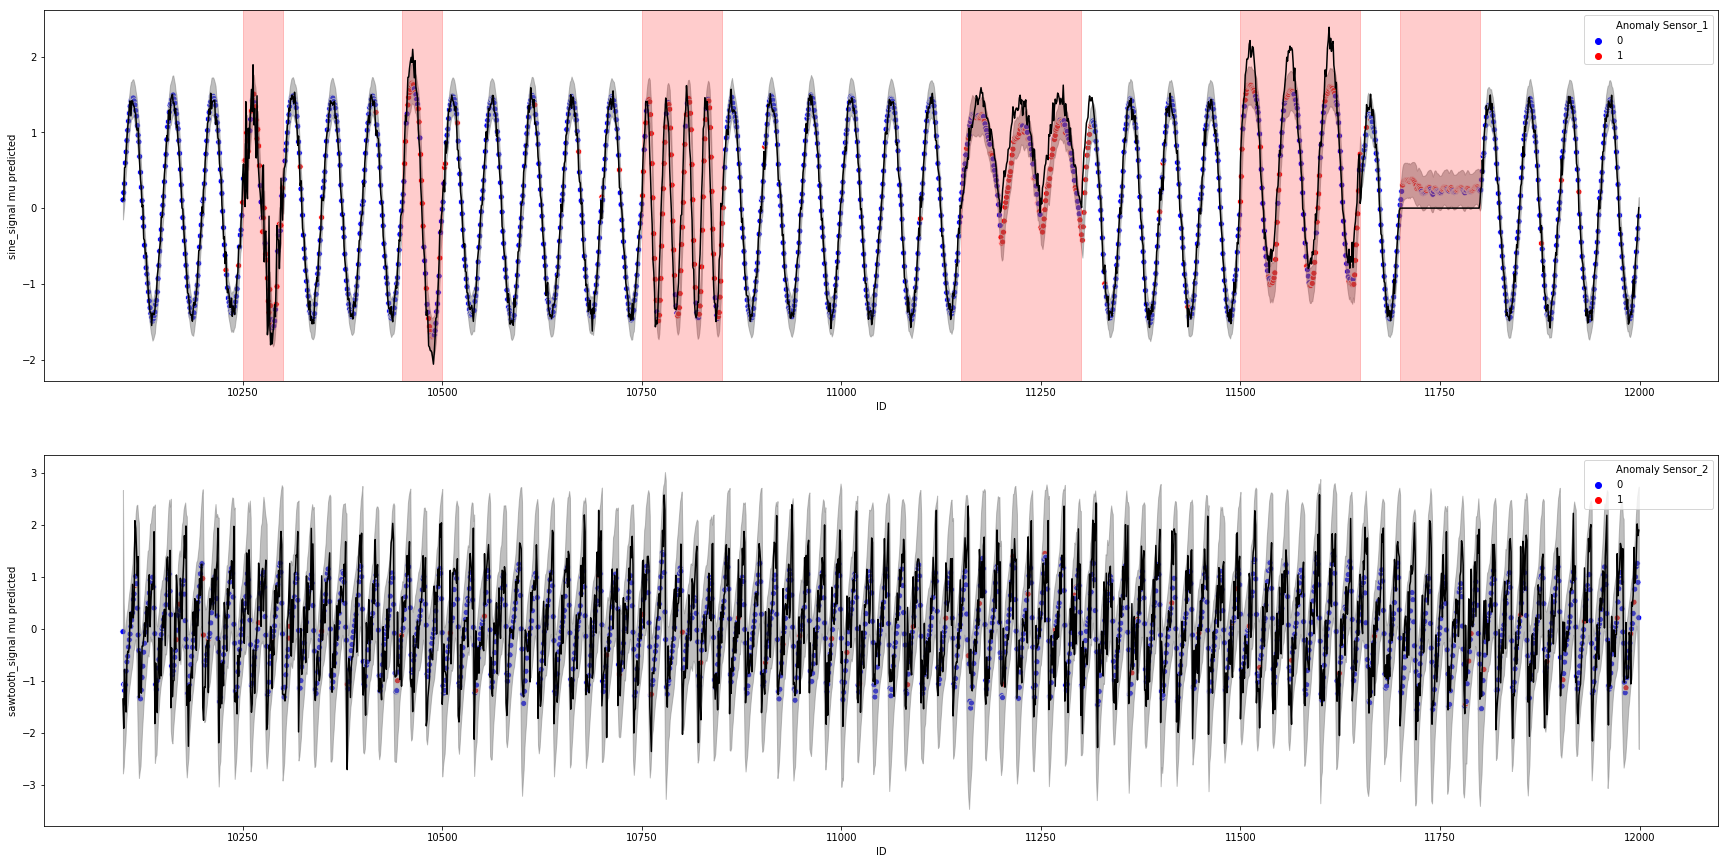

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(30,15))
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):
    #t = range(10000,artifical_data.shape[0]+10000)
    
    target = subset.iloc[:,i].values
    mu = subset.iloc[:,i+2].values
    sigma = subset.iloc[:,i+4].values
    lower_bound = mu - 2*sigma
    upper_bound = mu + 2* sigma
    
    sns.lineplot(data=subset, 
                 x=t, 
                 y=columns[i], 
                 ax=ax[i-1], 
                 color="black")
    sns.scatterplot(data=subset, 
                    x=t, 
                    y=columns[i+2],
                    ax=ax[i-1], 
                    hue=columns[i+9], 
                    palette=["blue", "red"])
    ax[i-1].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
    if i == 1:
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')
    
plt.show()


## Evaluation Metrics
### F1-score
Exact labels are provided, thus F1-score can be computed

In [4]:
anomaly_label_ground_truth = artifical_data.anomaly
anomaly_label_by_model = artifical_data["Anomaly Sensor_1"]
print(f1_score(anomaly_label_ground_truth, anomaly_label_by_model, average='macro'))

0.7715045087802563


### Confusion Matrix

In [5]:
tn, fp, fn, tp = confusion_matrix(anomaly_label_ground_truth, anomaly_label_by_model).ravel()
print("Positive --> Anomaly")
print("Negative --> Normal Behaviour")
print("--"*15)
print("True negative: {}".format(tn))
print("False positive: {}".format(fp))
print("False negative: {}".format(fn))
print("True positive: {}".format(tp))

Positive --> Anomaly
Negative --> Normal Behaviour
------------------------------
True negative: 11022
False positive: 278
False negative: 253
True positive: 347
